# 1-Problématique

Une entreprise souhaite prédire les prix des maisons en fonction de
leurs caractéristiques.

# 2-Collecte des données

## 2.1-Importation des Packages

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib


## 2.2-Importation de la Base de Données

In [2]:

# Importation des données
data = pd.read_csv("HousingData.csv")

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# Renommage des colonnes
data.columns = ["Taux_criminalite", "Prop_terrains_resid", "Prop_acres_indus", "Bordure_riviere", "Concentration_NO2",
                "Nb_pieces_logement", "Prop_log_construits","Dist_ponderees_emploi", "Accessibilite_autoroute",
                "Taux_impot_foncier", "Ratio_eleve_prof", "Prop_noirs_ville", "Pourcentage_pop_inf", "Valeur_med_logement"]
# Affichage des 5 premières lignes de la base de données avec les noms de colonnes renommés
data.head()


,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


1. **Taux_criminalite :** Taux de criminalité par habitant par ville.
2. **Prop_terrains_resid :** Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
3. **Prop_acres_indus :** Proportion d'acres industriels non commerciaux par ville.
4. **Bordure_riviere :** Variable fictive Charles River (= 1 si le tronçon borde la rivière ; 0 sinon).
5. **Concentration_NO2 :** Concentration de dioxyde d'azote (parties par 10 millions).
6. **Nb_pieces_logement :** Nombre moyen de pièces par logement.
7. **Prop_log_construits :** Proportion de logements occupés par leur propriétaire construits avant 1940.
8. **Dist_ponderees_emploi :** Distances pondérées aux cinq centres d'emploi de Boston.
9. **Accessibilite_autoroute :** Indice d'accessibilité aux autoroutes radiales.
10. **Taux_impot_foncier :** Taux d'impôt foncier sur la valeur totale de la propriété.
11. **Ratio_eleve_prof :** Ratio élève-professeur par ville.
12. **Prop_noirs_ville :** Proportion de la population noire par ville.
13. **Pourcentage_pop_inf :** Pourcentage de statut inférieur de la population.
14. **Valeur_med_logement :** Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars.

    
    En résumé, la base de données Boston Housing fournit des données socio-économiques et démographiques pour différents quartiers de Boston, ainsi que le prix médian des maisons dans ces quartiers. L'objectif est d'utiliser les caractéristiques des quartiers pour prédire la valeur des biens immobiliers.


## 2.2-Vérification de la qualité des données

### Valeurs manquantes

In [5]:
data.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_values = data.isnull().sum() / len(data) * 100

# Créer un DataFrame pour afficher les résultats
missing_values_df = pd.DataFrame({'Variable': missing_values.index, 'Pourcentage de valeurs manquantes': missing_values.values})

# Trier le DataFrame par ordre décroissant du pourcentage de valeurs manquantes
missing_values_df = missing_values_df.sort_values(by='Pourcentage de valeurs manquantes', ascending=False)

# Afficher le tableau
missing_values_df

,Variable,Pourcentage de valeurs manquantes
0,Taux_criminalite,3.952569
1,Prop_terrains_resid,3.952569
2,Prop_acres_indus,3.952569
3,Bordure_riviere,3.952569
6,Prop_log_construits,3.952569
12,Pourcentage_pop_inf,3.952569
4,Concentration_NO2,0.000000
5,Nb_pieces_logement,0.000000
7,Dist_ponderees_emploi,0.000000
8,Accessibilite_autoroute,0.000000


In [7]:
# Supprimer les lignes avec des valeurs manquantes
data_cleaned = data.dropna()

In [8]:
data_cleaned.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Valeurs extremes

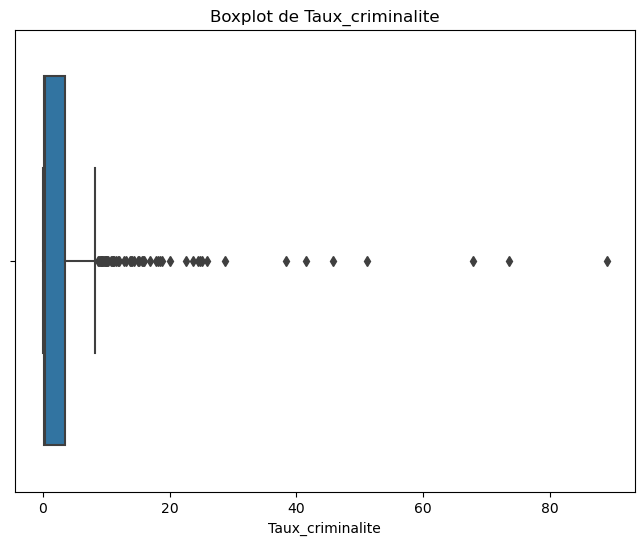

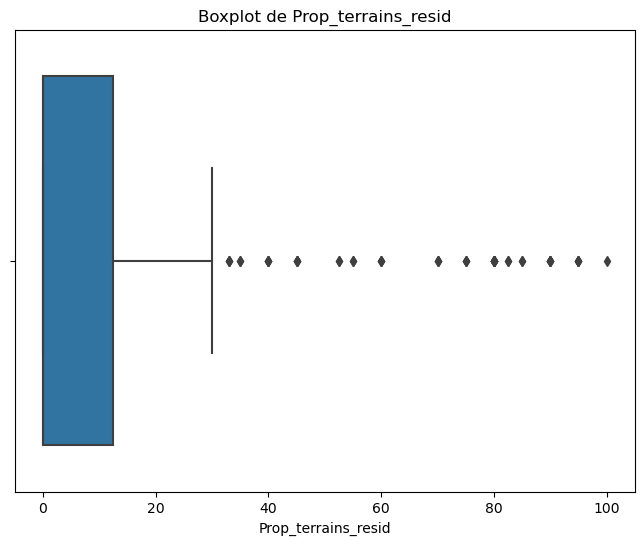

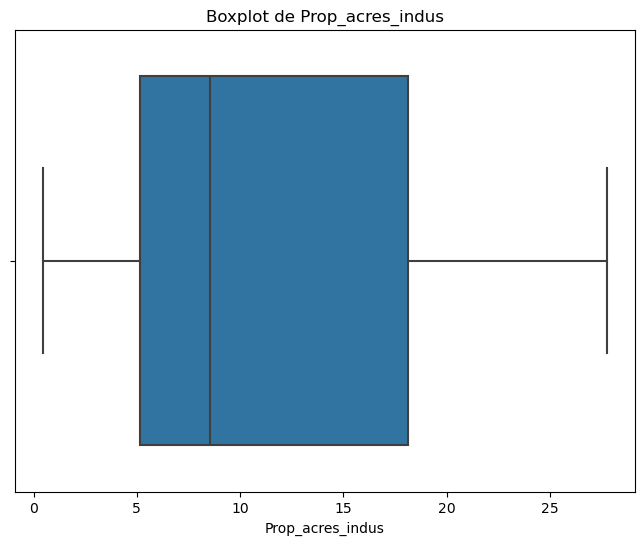

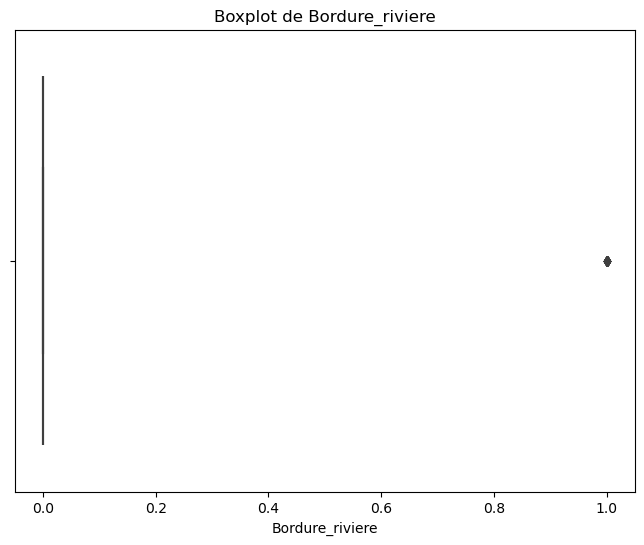

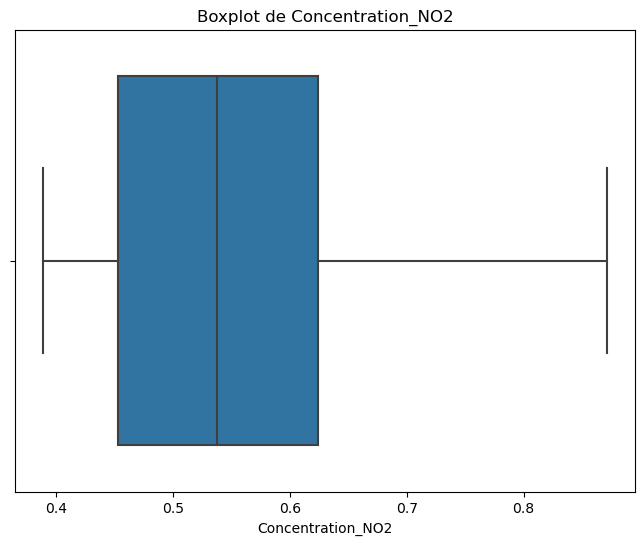

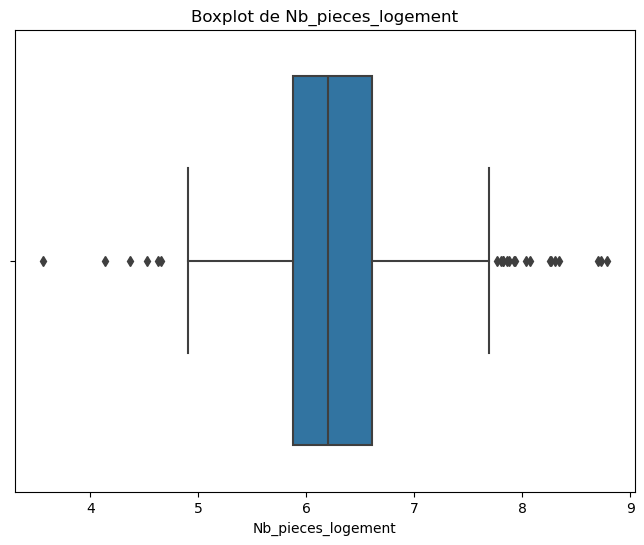

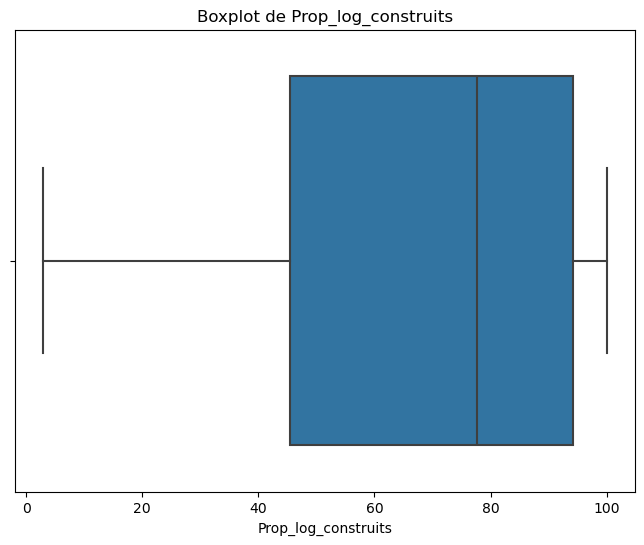

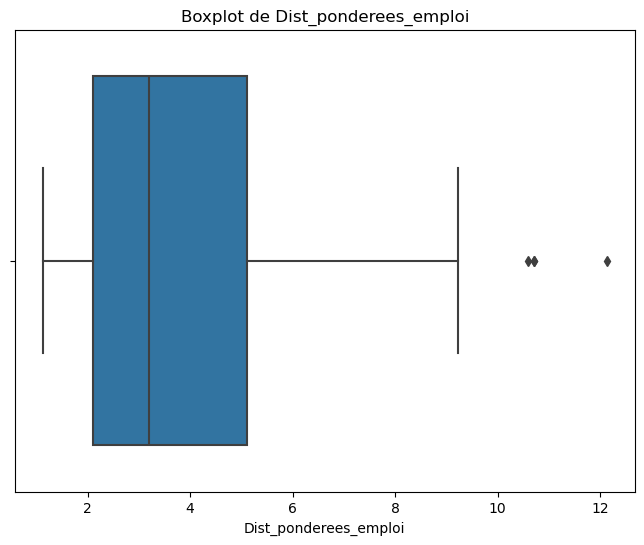

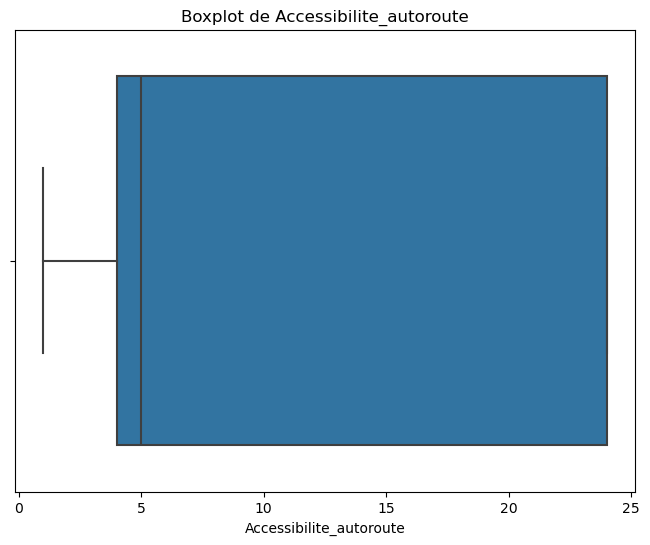

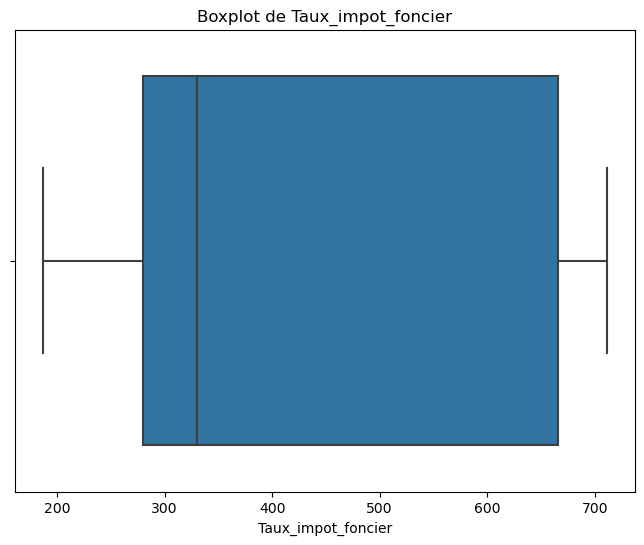

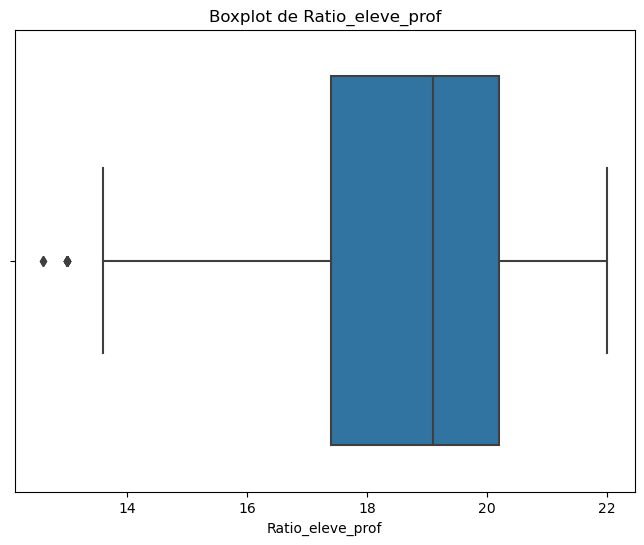

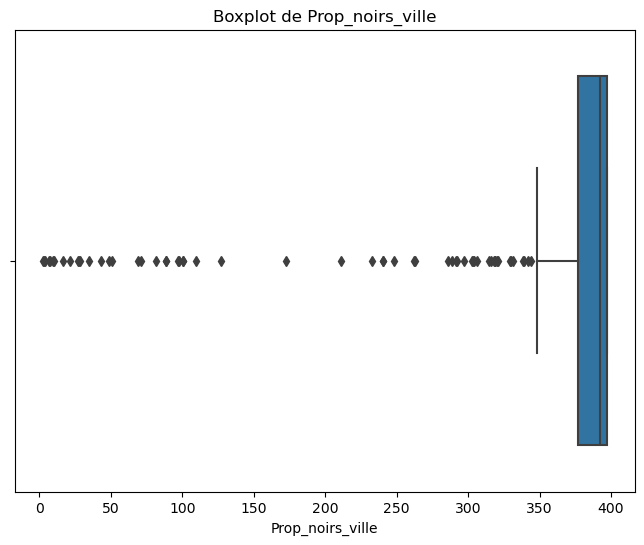

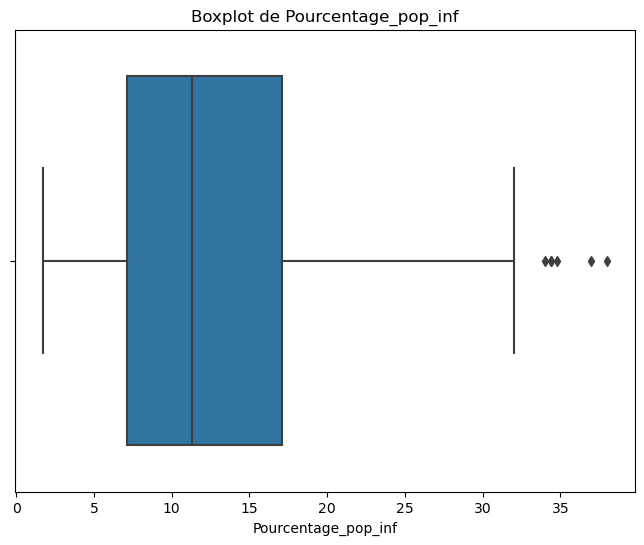

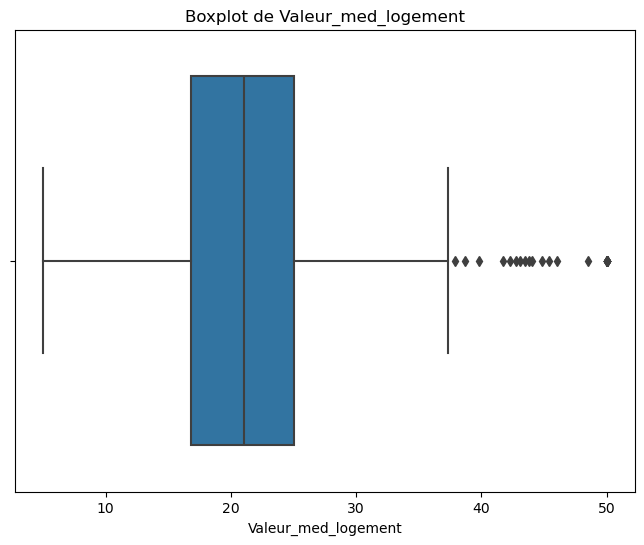

In [9]:
# Visualisation des données  #Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes numériques
numerical_cols = data_cleaned.select_dtypes(include=['number'])

# Créer les boxplots pour chaque colonne numérique
for col in numerical_cols.columns:
  plt.figure(figsize=(8, 6))  # Ajuster la taille de la figure si nécessaire
  sns.boxplot(x=data_cleaned[col])
  plt.title(f'Boxplot de {col}')
  plt.show()

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


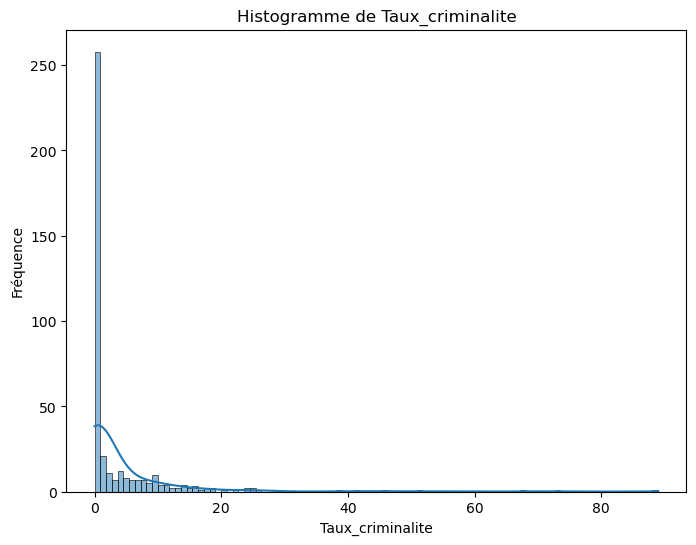

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


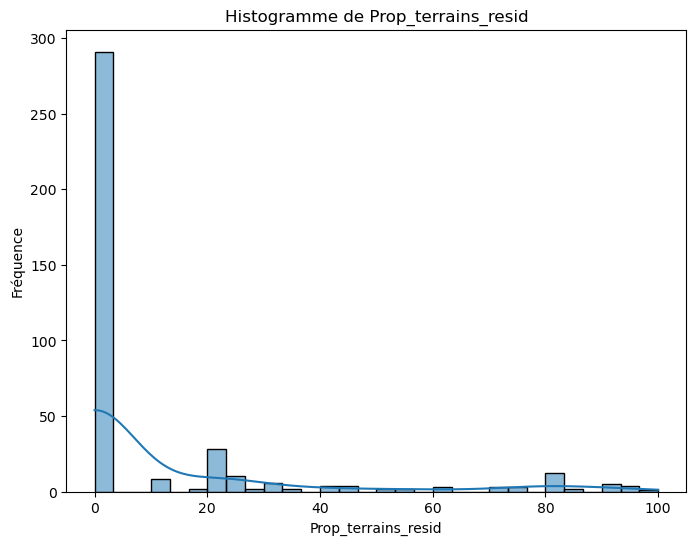

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


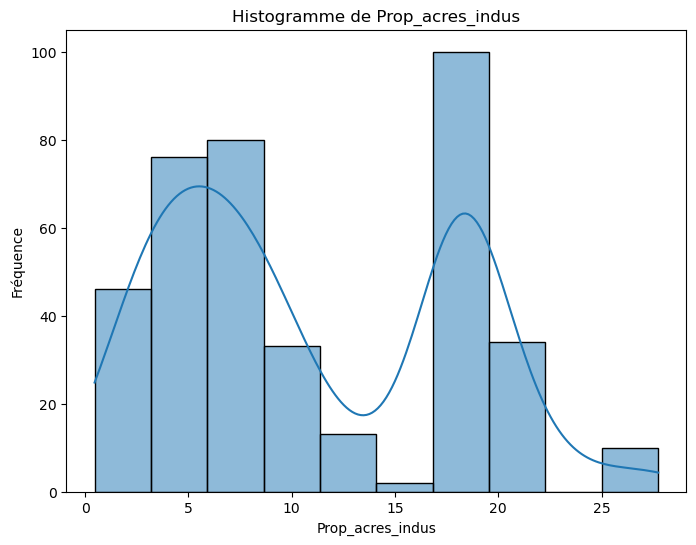

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


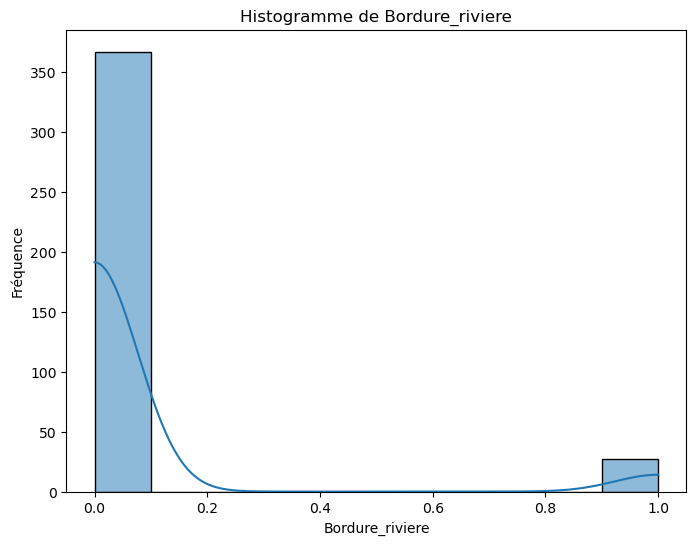

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


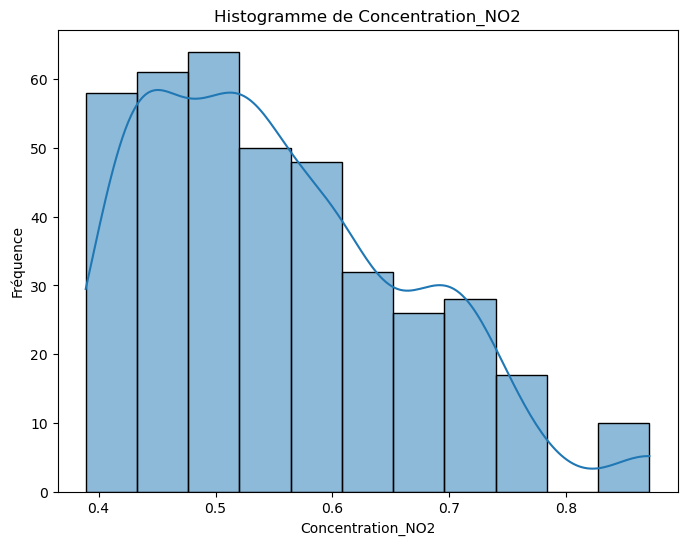

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


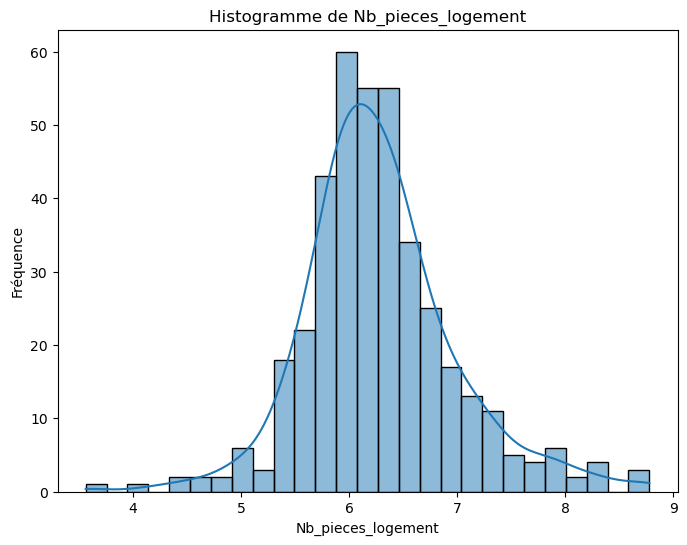

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


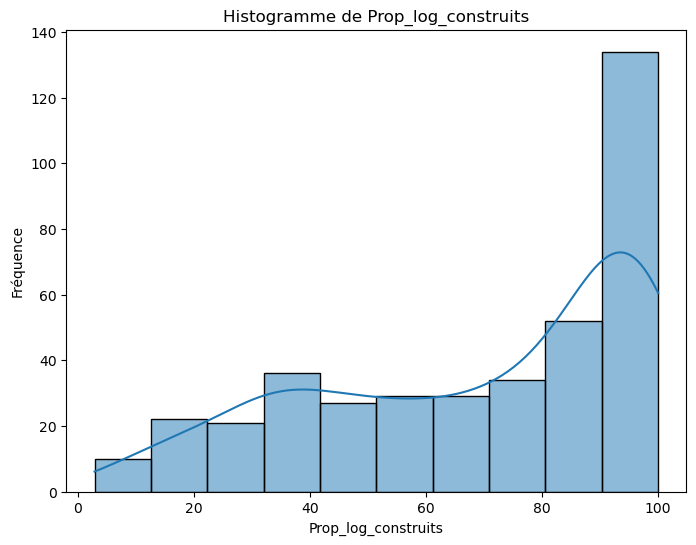

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


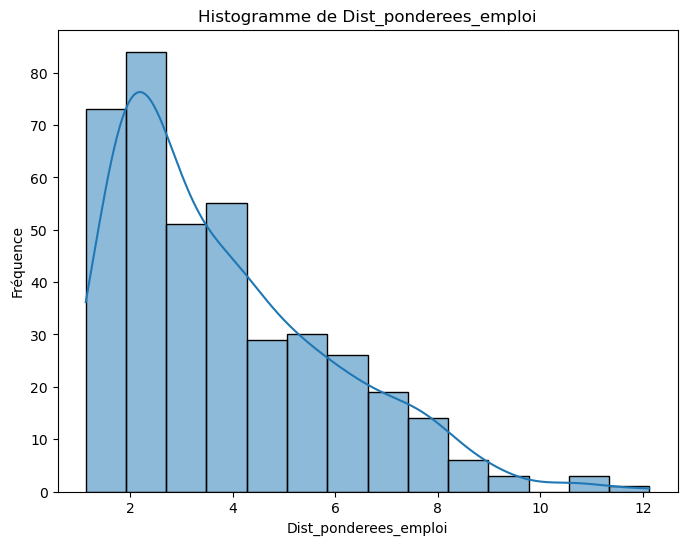

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


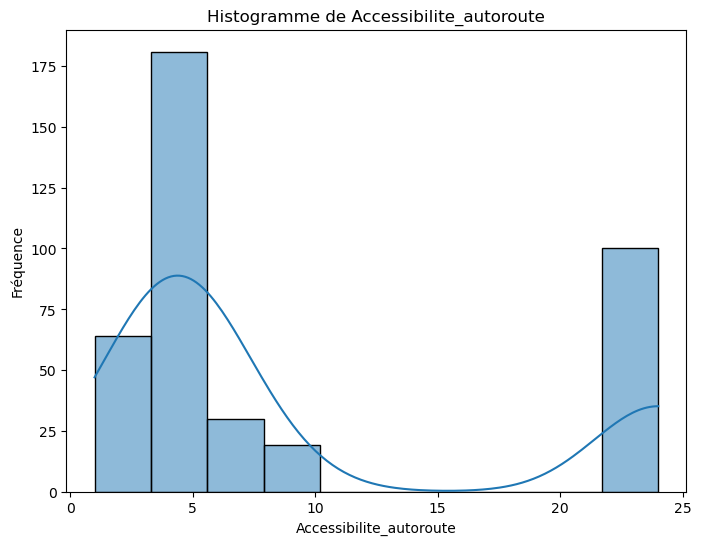

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


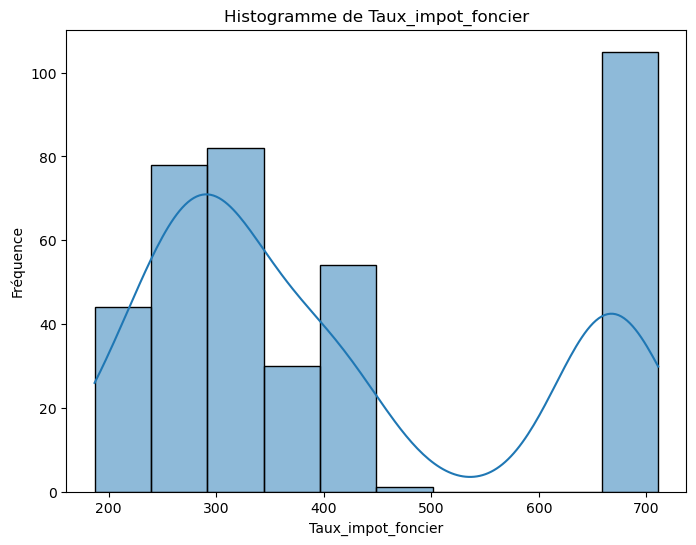

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


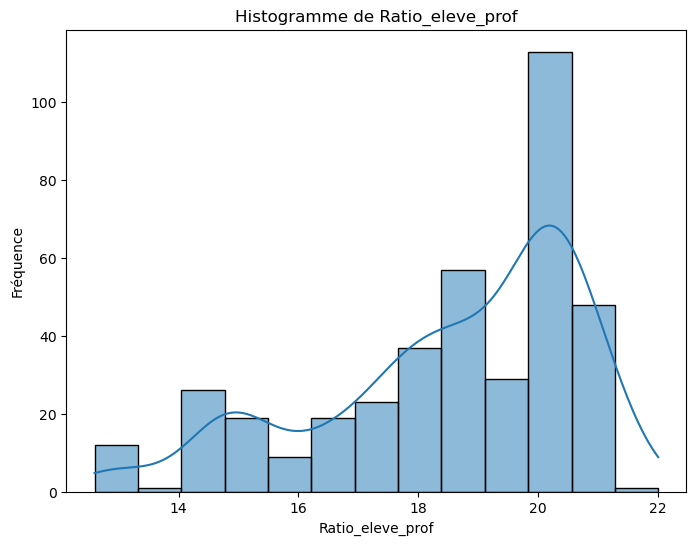

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


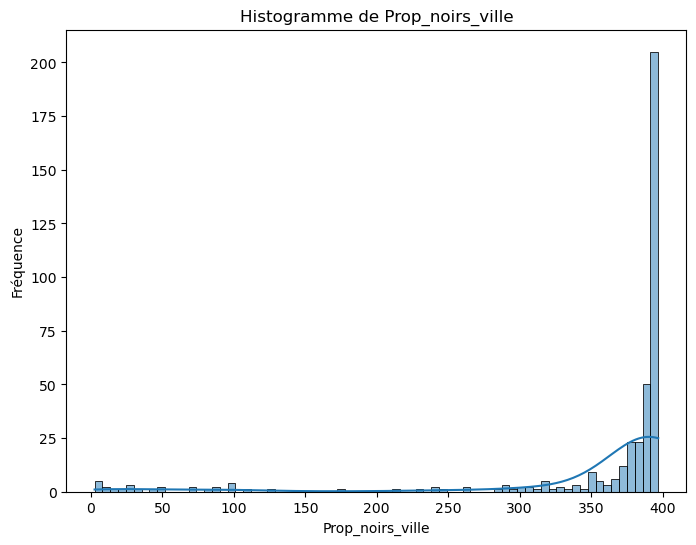

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


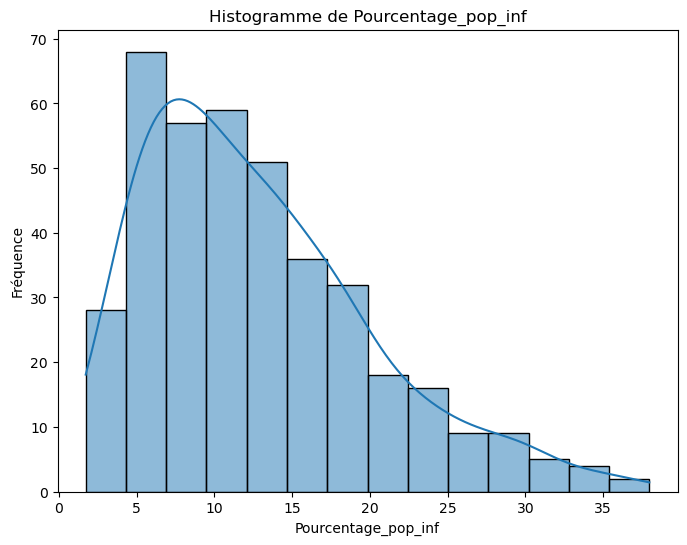

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


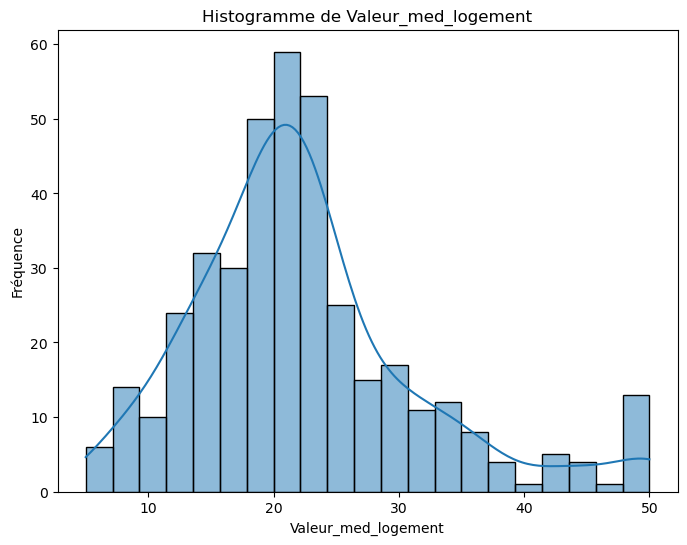

In [10]:
#Visualisation des données #Histogramme
# Sélectionner uniquement les colonnes numériques
numerical_cols = data_cleaned.select_dtypes(include=['number'])

# Créer les histogrammes pour chaque colonne numérique
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))  # Ajuster la taille de la figure si nécessaire
    sns.histplot(data_cleaned[col], kde=True)  # Ajouter kde=True pour afficher la densité
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

In [11]:

# Convertir la variable CHAS en variable catégorielle
data_cleaned['Bordure_riviere'] = data_cleaned['Bordure_riviere'].astype('category')

C:\Users\FILS\AppData\Local\Temp\ipykernel_26828\2965536786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Bordure_riviere'] = data_cleaned['Bordure_riviere'].astype('category')


c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


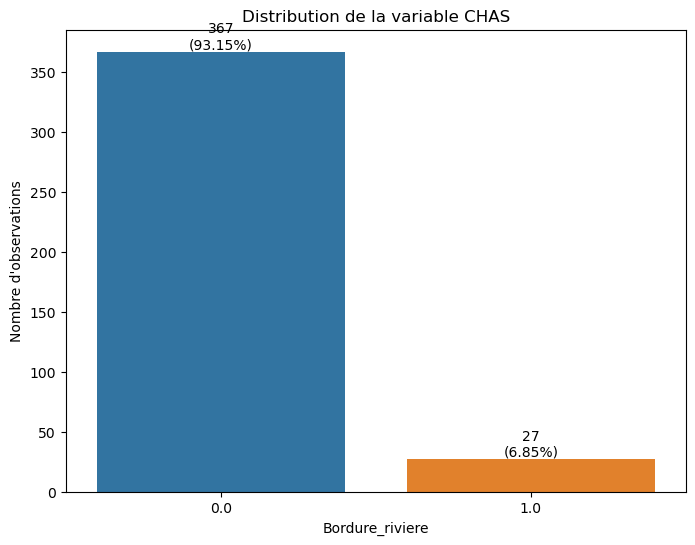

In [12]:
# Calcul de la proportion de la variable "Bordure_riviere"
chas_counts = data_cleaned['Bordure_riviere'].value_counts()
chas_proportions = data_cleaned['Bordure_riviere'].value_counts(normalize=True)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Bordure_riviere', data=data_cleaned)
plt.title('Distribution de la variable CHAS')
plt.xlabel('Bordure_riviere')
plt.ylabel('Nombre d\'observations')

# Add counts and proportions as text annotations
for i, count in enumerate(chas_counts):
    proportion = chas_proportions[i]
    plt.text(i, count, f'{count}\n({proportion:.2%})', ha='center', va='bottom')

plt.show()

# 3-Selection des variables pertinentes

## 3.1-Relation entre les variables quantitatives

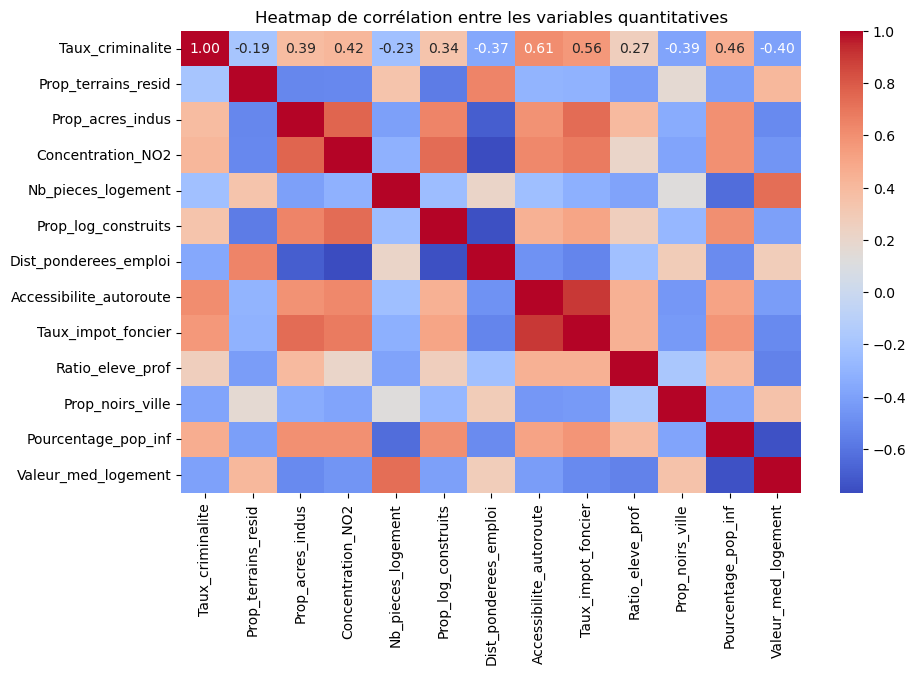

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes numériques pour la heatmap de corrélation
numerical_cols = data_cleaned.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_cols.corr()

# Créer la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de corrélation entre les variables quantitatives')
plt.show()

## 3.2-Relation entre la variable catégorielle et les variables quantitatives

c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


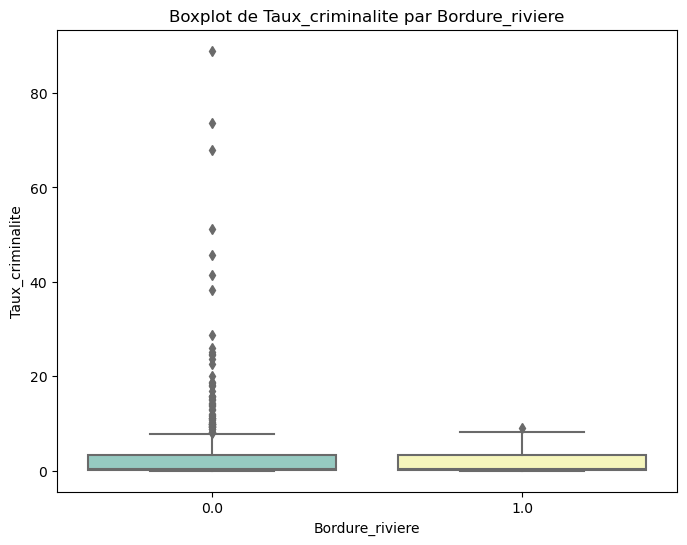

Kruskal-Wallis Test for Taux_criminalite:
Statistic: 0.60
P-value: 0.437
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


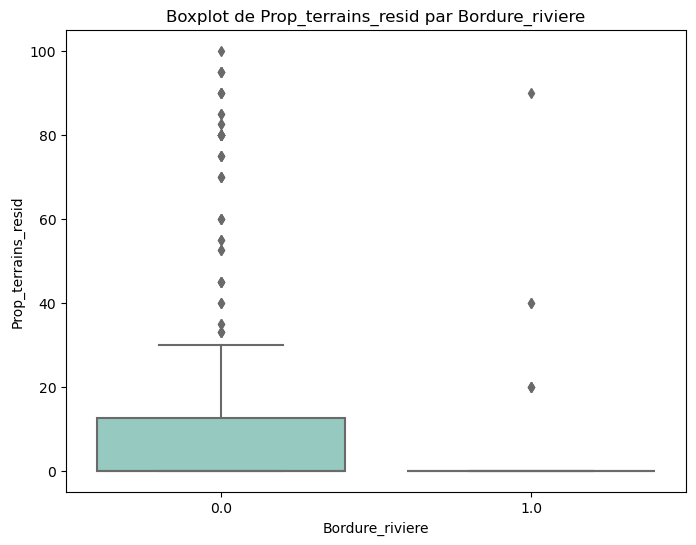

Kruskal-Wallis Test for Prop_terrains_resid:
Statistic: 0.31
P-value: 0.576
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


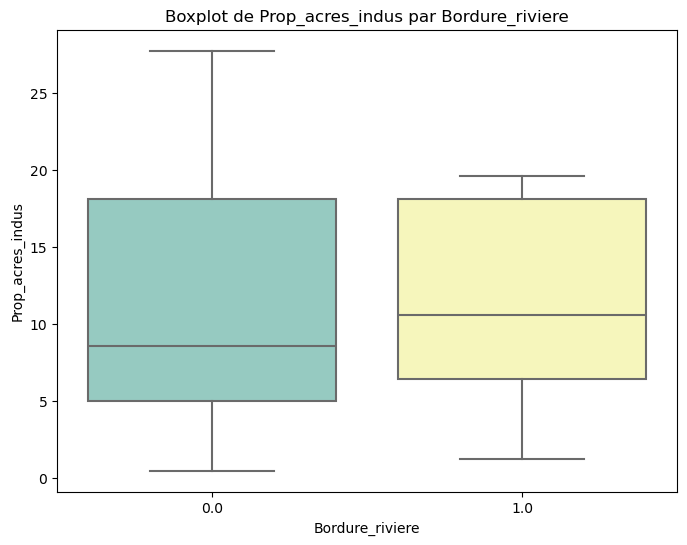

Kruskal-Wallis Test for Prop_acres_indus:
Statistic: 2.05
P-value: 0.153
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


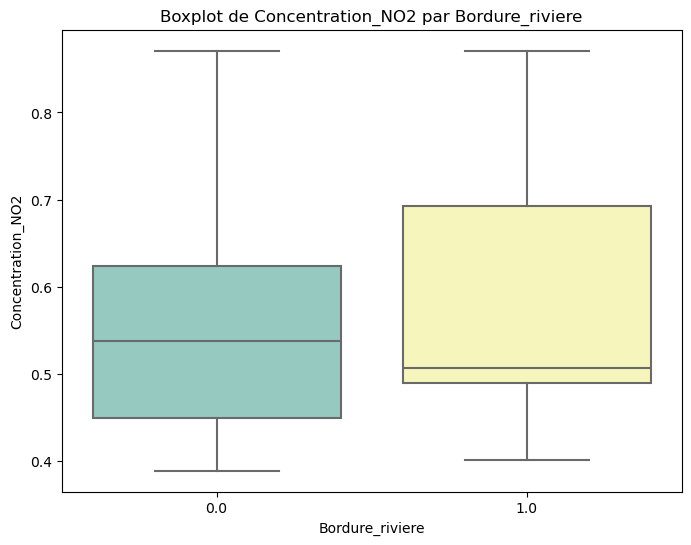

Kruskal-Wallis Test for Concentration_NO2:
Statistic: 1.12
P-value: 0.290
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


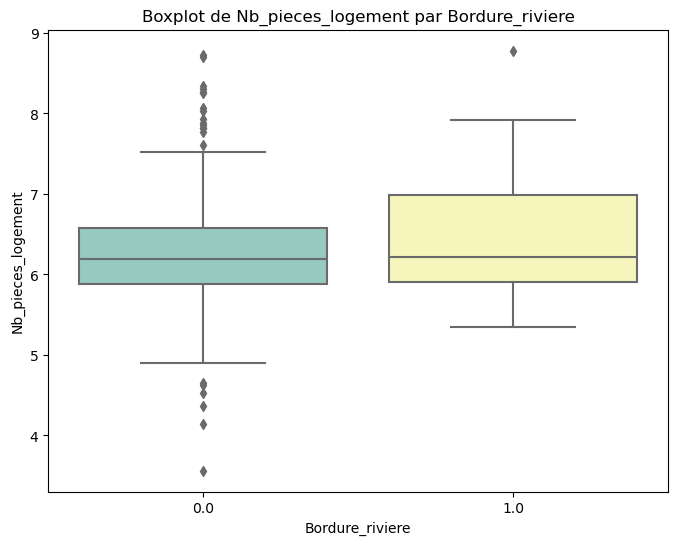

Kruskal-Wallis Test for Nb_pieces_logement:
Statistic: 1.08
P-value: 0.298
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


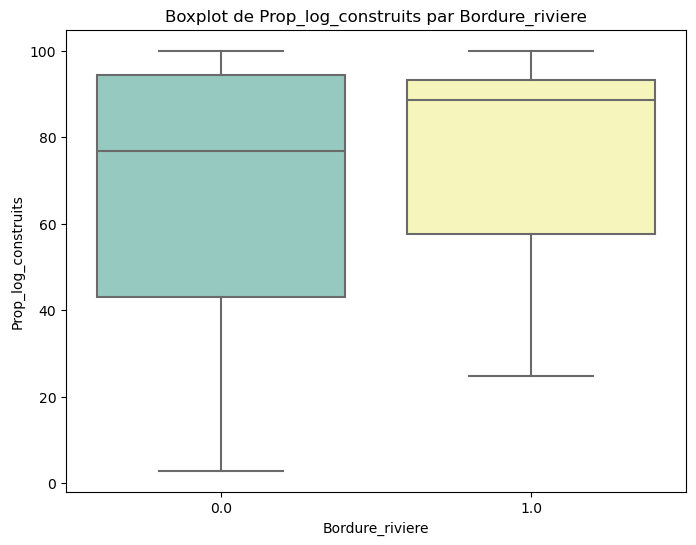

Kruskal-Wallis Test for Prop_log_construits:
Statistic: 1.29
P-value: 0.256
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


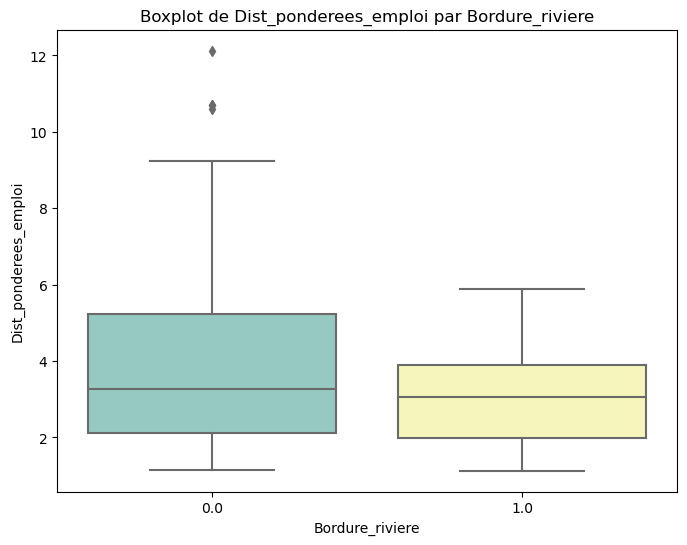

Kruskal-Wallis Test for Dist_ponderees_emploi:
Statistic: 2.07
P-value: 0.151
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


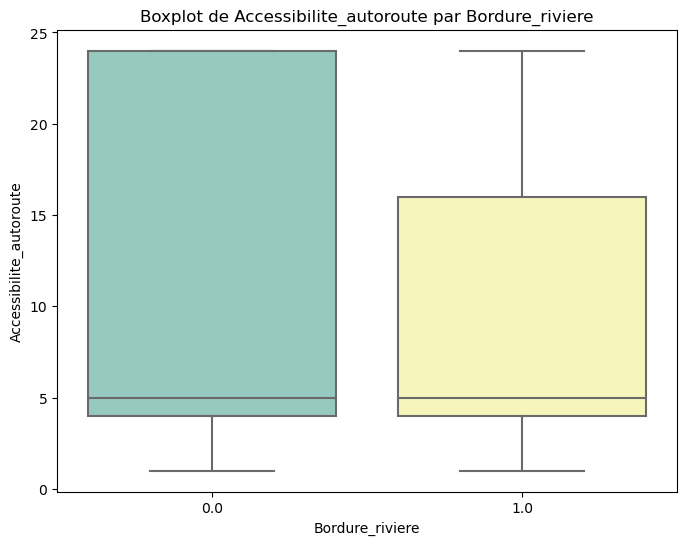

Kruskal-Wallis Test for Accessibilite_autoroute:
Statistic: 0.48
P-value: 0.489
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


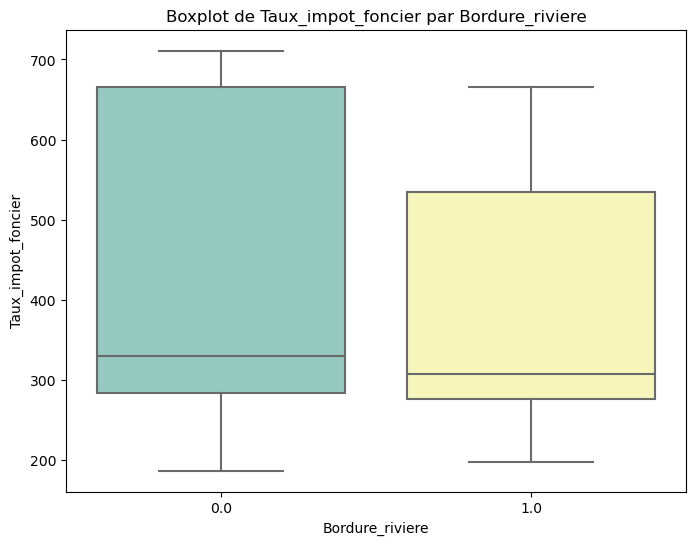

Kruskal-Wallis Test for Taux_impot_foncier:
Statistic: 0.87
P-value: 0.351
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


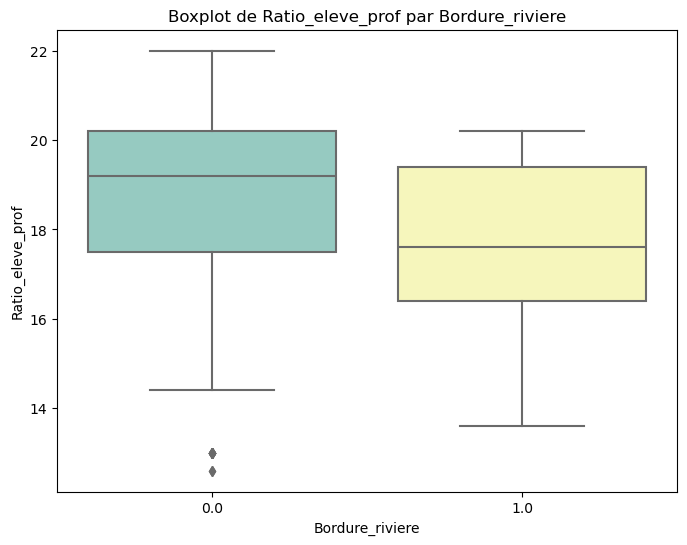

Kruskal-Wallis Test for Ratio_eleve_prof:
Statistic: 5.86
P-value: 0.015
There is a statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


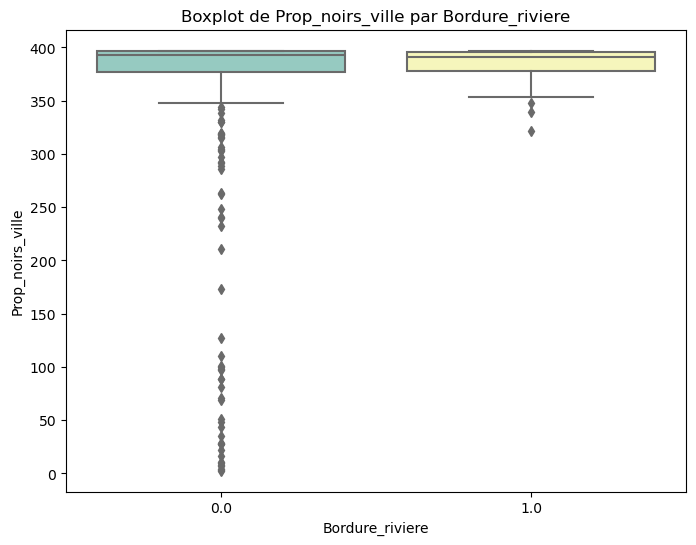

Kruskal-Wallis Test for Prop_noirs_ville:
Statistic: 0.42
P-value: 0.516
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


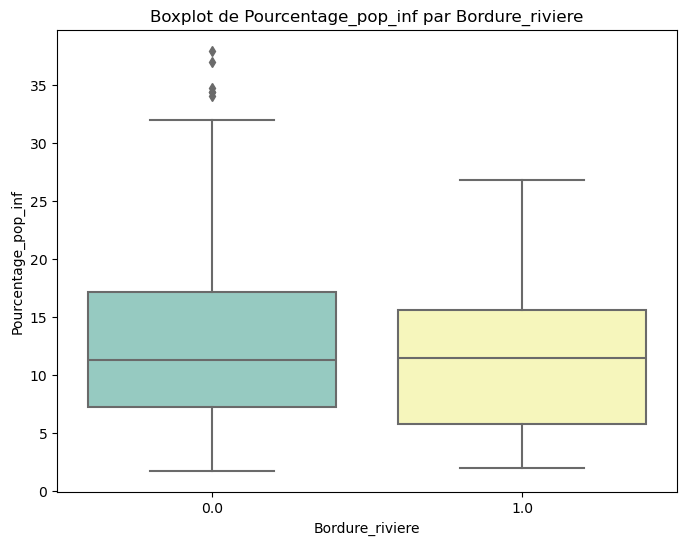

Kruskal-Wallis Test for Pourcentage_pop_inf:
Statistic: 0.42
P-value: 0.518
There is no statistically significant difference between groups.



c:\Users\FILS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


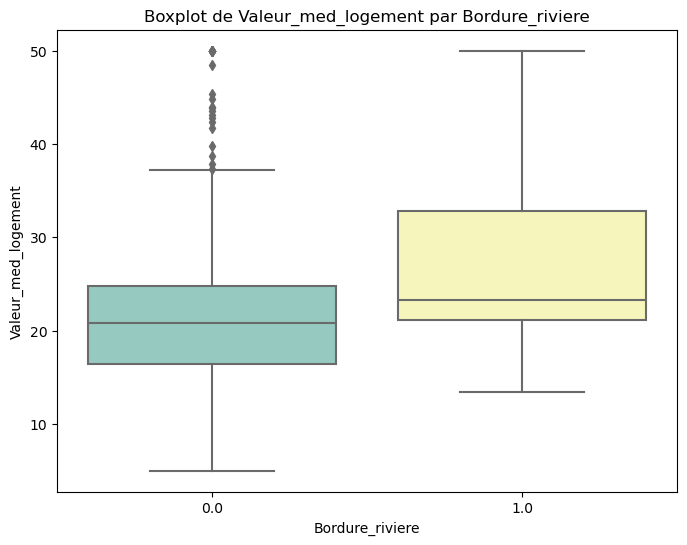

Kruskal-Wallis Test for Valeur_med_logement:
Statistic: 8.23
P-value: 0.004
There is a statistically significant difference between groups.



In [14]:
from scipy.stats import kruskal

# Assuming 'data_cleaned' is your DataFrame and 'CHAS' is your qualitative variable

# List of numerical columns
numerical_cols = data_cleaned.select_dtypes(include=['number']).columns

# Create boxplots and perform Kruskal-Wallis test
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Bordure_riviere', y=col, data=data_cleaned, palette="Set3")
    plt.title(f'Boxplot de {col} par Bordure_riviere')
    plt.show()

    # Kruskal-Wallis test
    groups = [data_cleaned[col][data_cleaned['Bordure_riviere'] == i] for i in data_cleaned['Bordure_riviere'].unique()]
    statistic, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis Test for {col}:")
    print(f"Statistic: {statistic:.2f}")
    print(f"P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("There is a statistically significant difference between groups.\n")
    else:
        print("There is no statistically significant difference between groups.\n")

In [15]:
# Extraction des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
corr_threshold = 0.6
corr_vars = correlation_matrix[abs(correlation_matrix["Valeur_med_logement"]) > corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Valeur_med_logement) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Valeur_med_logement) :

['Nb_pieces_logement', 'Pourcentage_pop_inf', 'Valeur_med_logement']


In [16]:

# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = 0.8
corr_pairs = {}

for col in correlation_matrix.columns:
    corr_pairs[col] = []
    corr_values = correlation_matrix[abs(correlation_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

Accessibilite_autoroute - Taux_impot_foncier
Taux_impot_foncier - Accessibilite_autoroute


# 4-Modélisation statistique : Regression Linéaire

In [17]:
#Retrait de la variable redondante
data_cleaned.drop('Accessibilite_autoroute', axis=1)

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits,Dist_ponderees_emploi,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data_cleaned' is your DataFrame and 'MEDV' is your target variable

# Define features (X) and target (y)
X = data_cleaned.drop('Valeur_med_logement', axis=1)
y = data_cleaned['Valeur_med_logement']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True) #Drop first to avoid multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Caractéristique de la base d'entrainement

## Regression Linéaire

In [19]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Valeurs prédites et valeurs observés
y_pred = model.predict(X_test)
# Create a DataFrame to store the results
results_df = pd.DataFrame({'Valeur Observée': y_test, 'Valeur Prédite': y_pred})

# Reset the index to avoid issues if the original index was not sequential
results_df = results_df.reset_index(drop=True)

# Add the features from X_test
results_df = pd.concat([X_test.reset_index(drop=True), results_df], axis=1)

results_df

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Concentration_NO2,Nb_pieces_logement,Prop_log_construits,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Bordure_riviere_1.0,Valeur Observée,Valeur Prédite
0,0.02875,28.0,15.04,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21,False,25.0,29.228502
1,0.07244,60.0,1.69,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,False,18.6,17.503747
2,0.47547,0.0,9.90,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,False,21.0,21.808038
3,0.03584,80.0,3.37,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,False,23.5,30.494253
4,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,False,17.5,18.502655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,4.34879,0.0,18.10,0.580,6.167,84.0,3.0334,24,666,20.2,396.90,16.29,False,19.9,19.265780
75,0.12083,0.0,2.89,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,False,38.7,35.607759
76,0.35233,0.0,21.89,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59,False,17.1,19.347960
77,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,False,33.4,28.489825


## Mesures de performances du modéle

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    correlation = np.corrcoef(y_true, y_pred)[0, 1]

    return mse, rmse, mae, mape, r2, correlation

# Make predictions on the training set
y_pred_train = model.predict(X_train)


# Evaluate the model on the training set
mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train = evaluate_model(y_train, y_pred_train)

# Evaluate the model on the test set
mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test = evaluate_model(y_test, y_pred)


# Create a DataFrame to display the results
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'Correlation'],
    'Train': [mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train],
    'Test': [mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test]
})

results

,Metric,Train,Test
0,MSE,16.692213,31.454048
1,RMSE,4.085610,5.608391
2,MAE,2.961295,3.367983
3,MAPE,0.153711,0.146586
4,R2,0.797598,0.627085
5,Correlation,0.893084,0.794652


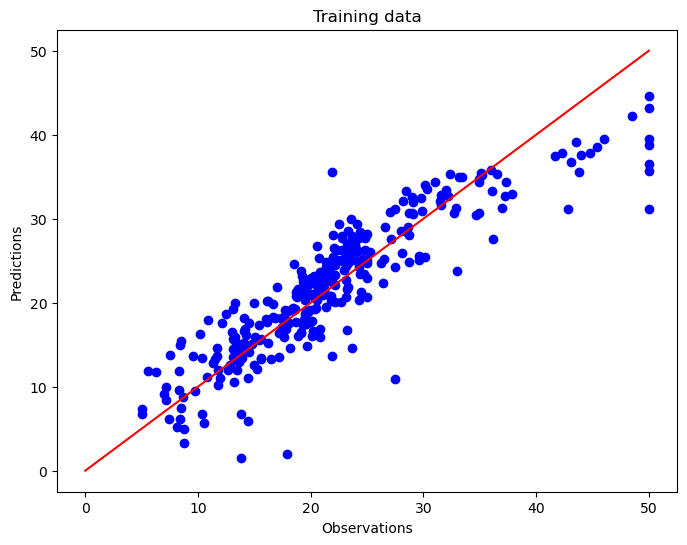

In [22]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue')
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title('Training data')
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()


# 5-Vérifications des hypothéses

## 5.1-Vérification de l'homoscédasticité

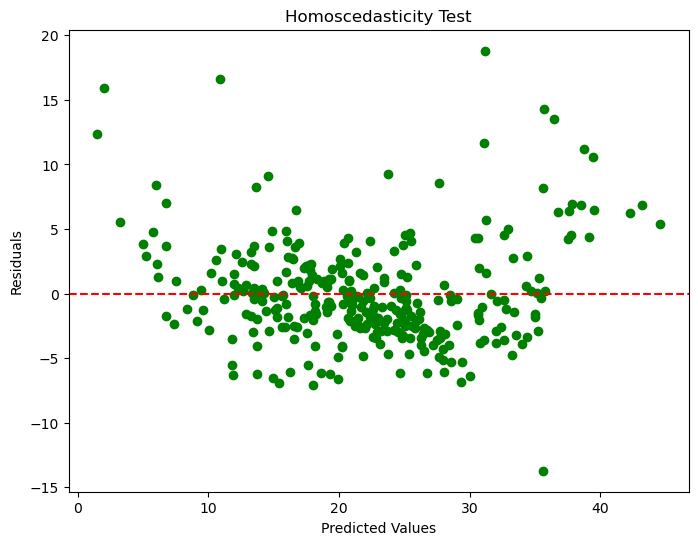

Breusch-Pagan test statistics: 31.73945011193553
Breusch-Pagan test p-value: 0.0026252711901424025


,Values
Test Statistic,31.739450
p-value,0.002625


In [23]:
# prompt: Vérifie moi l'homoscédasticité dans ce modèle de regression linéaire

# Homoscedasticity test
residuals = y_train - y_pred_train
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, residuals, color='green')
plt.title('Homoscedasticity Test')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.show()

# Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Add a constant to X_train
X_train_with_const = sm.add_constant(X_train)  # This line adds the constant

bp_test = het_breuschpagan(residuals, X_train_with_const)
print("Breusch-Pagan test statistics:", bp_test[0])
print("Breusch-Pagan test p-value:", bp_test[1])
labels = ['Test Statistic', 'p-value']
values = [bp_test[0], bp_test[1]]
bp_results = pd.DataFrame(values, index=labels, columns=['Values'])
bp_results

## 5.2-Vérification de la multicolinéarité

In [24]:
# prompt: effectue moi le test de multicolinéarité

# Assuming 'data_cleaned' is your DataFrame and you've already performed the steps up to the correlation matrix

# Calculate Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define features (X)
X = data_cleaned.drop('Valeur_med_logement', axis=1)

# Convert categorical features to numerical using one-hot encoding (if necessary)
# Explicitly convert 'Bordure_riviere' to numeric before creating dummies
X['Bordure_riviere'] = pd.to_numeric(X['Bordure_riviere'], errors='coerce')  # Convert to numeric, errors will be NaNs
X = pd.get_dummies(X, drop_first=True) #Drop first to avoid multicollinearity

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF values
vif_data


# Interpretation of VIF values
# VIF = 1: No multicollinearity
# VIF between 1 and 5: Moderate multicollinearity
# VIF greater than 5: High multicollinearity

# Consider removing features with high VIF values to mitigate multicollinearity
# For example:
# features_to_remove = vif_data[vif_data["VIF"] > 5]["feature"].tolist()
# X = X.drop(features_to_remove, axis=1)

,feature,VIF
0,Taux_criminalite,2.011942
1,Prop_terrains_resid,2.852310
2,Prop_acres_indus,14.263622
3,Bordure_riviere,1.147677
4,Concentration_NO2,78.195871
5,Nb_pieces_logement,83.387397
6,Prop_log_construits,22.405731
7,Dist_ponderees_emploi,14.367439
8,Accessibilite_autoroute,13.986225
9,Taux_impot_foncier,58.485821


## 5.3-Vérification de la normalité

In [25]:
import scipy.stats as stats

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# Test d'Anderson-Darling
anderson_test = stats.anderson(residuals, dist='norm')

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un dataframe
df_normality = pd.DataFrame({
    'Test de normalité': ['Shapiro-Wilk', 'Anderson-Darling', 'Kolmogorov-Smirnov'],
    'Statistique': [shapiro_test.statistic, anderson_test.statistic, ks_test.statistic],
    'p-value': [shapiro_test.pvalue, 'N/A', ks_test.pvalue]
})

# Afficher le tableau
print(df_normality)

    Test de normalité  Statistique p-value
0        Shapiro-Wilk     0.922622     0.0
1    Anderson-Darling     5.559817     N/A
2  Kolmogorov-Smirnov     0.321946     0.0


## 5.4-Vérification de la moyenne des résidus

In [26]:
residuals.mean()

2.7068294695622867e-16

## 5.5-Vérification de l'autocorrelation des erreurs

In [27]:
from statsmodels.stats.stattools import durbin_watson
# Test d'autocorrélation
dw_test = durbin_watson(residuals)
print("Test de Durbin-Watson : statistique = %f" % dw_test)

Test de Durbin-Watson : statistique = 1.736484


In [28]:
# Enregistrer le modèle
joblib.dump(model, 'Prediction_Prix_Maisons.pkl')

['Prediction_Prix_Maisons.pkl']